In [ ]:
%matplotlib inline

In [ ]:
import random
import winsound

import matplotlib.pyplot as plt
import noise
import numpy as np
from IPython.display import Audio
from mpl_toolkits.mplot3d import axes3d
from scipy.interpolate import make_interp_spline

# Perlin Noise

### 1. Goals

The point of this article is to understand what Perlin noise is. How it works? To see it in all dimensions. To hear how it would sound and to play around with it a little.

### 2. Abstract 

Perlin noise is much easier to create from texturing and it’s size would be pretty small.

### Table of Contents
1. [Goals](#1.-Goals)
2. [Abstract](#2.-Abstract)
3. [Introduction](#3.-Introduction)
    - [3.1. History of Perlin Noise](#3.1.-History-of-Perlin-Noise)
    - [3.2. What is Perlin Noise](#3.2.-What-is-Perlin-Noise)
    - [3.3. Use Cases](#3.3.-Use-Cases)
4. [Perlin Noise 1D](#4.-Perlin-Noise-1D)
5. [Algoritum explanation](#5.-Algoritum-explanation)
6. [Perlin Noise 2D](#6.-Perlin-Noise-2D)
7. [3D Perlin Noise](#7.-3D-Perlin-Noise)
8. [Music generation](#8.-Music-generation)
9. [Resources](#9.-Resources)

### 3. Introduction 

#### 3.1. History of Perlin Noise

Ken Perlin developed the noise function while working on the original 'Tron' movie in the early 1980s. He used it to create procedural textures for computer-generated effects. In 1997, Perlin won an Academy Award in technical achievements for his work.

#### 3.2. What is Perlin Noise

For the development of the Perlin Noise, Ken Perlin used a technique to produce natural appearing textures on computer-generated surfaces for motion picture visual effects. The development of Perlin Noise has allowed computer graphic artists to better represent the complexity of natural phenomena in visual effects for the motion picture industry.

Perlin noise can be used to generate various effects with natural qualities, such as clouds, landscapes, and patterned textures like marble. Perlin noise has a more organic appearance because it produces a naturally ordered (“smooth”) sequence of pseudo-random numbers.

This is what Perlin noise looks like. We can see how the points are very close to each other and when we connect them it becomes a smooth curve.

[Source](attachment:4c3db7cc-744e-4a40-b83f-e9a119b0ac3f.png)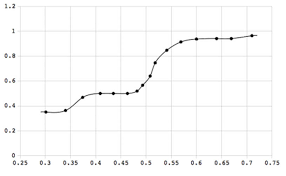

This is Random noise.

[Source](http://2.bp.blogspot.com/_q016kExGrVs/S-M1mnjKSWI/AAAAAAAAAW0/o2blGBGjYvQ/s280/JTS_random_points_in_grid.png)![](http://2.bp.blogspot.com/_q016kExGrVs/S-M1mnjKSWI/AAAAAAAAAW0/o2blGBGjYvQ/s280/JTS_random_points_in_grid.png)

#### 3.3. Use Cases

                             
|Illusion of handwritten lines(1D)|Generation textures(2D)|Field generation(3D)|
|:---------------------------------------:|:-------------:|:------:|
| __Normal square__ ![](https://img.favpng.com/22/23/25/quadrilateral-regular-polygon-square-parallelogram-png-favpng-zLWLJ0LRn3TjWxuR0sBZ9m1Vs.jpg) | __Map generation__ ![](https://i.stack.imgur.com/T0o4T.png)  | __Terrain generation__![](https://julienharbulot.com/images/procedural-terrain-generation/ridged-noise.jpg) |
| __Handwritten square__ ![](https://jestermax.files.wordpress.com/2012/08/handdrawn.png) | __Ocean generation__ ![](https://i.stack.imgur.com/jnll6.png)   | __Planetary ocean__ ![](http://i.imgur.com/YaJnaJS.jpg) |


We will best see the difference between 1D white noise curve and 1D Perlin noise curve.

### 4. Perlin Noise 1D 

In [ ]:
def WhiteNoise(size):
    # Above all I want to make White noise with random points.
    x = np.random.random(size)

    plt.plot(x)

    plt.xlabel("Sample Values")
    plt.ylabel("Samples")
    plt.title("White Noise")

    plt.show()
    return x


white_noise = WhiteNoise(450)

In [ ]:
def perlin_noise_1d(n_points, curve=float, lenght=int):
    x = np.array([x for x in range(n_points)])
    y = np.random.choice(curve, n_points)

    X_Y_Spline = make_interp_spline(
        x, y
    )  # using linear interpolation for generation 1D curve
    X_ = np.linspace(x.min(), x.max(), lenght)
    Y_ = X_Y_Spline(X_)

    plt.plot(Y_)
    plt.title("Perlin noise")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    return Y_


perlin_noise = perlin_noise_1d(450, 22, 450)

[Sourse](https://www.scratchapixel.com/images/upload/interpolation/lininterpfig.png)![](https://www.scratchapixel.com/images/upload/interpolation/lininterpfig.png)$$a(1−t)+bt$$

In [ ]:
white_noise = WhiteNoise(200)
perlin_noise = perlin_noise_1d(200, 22, 200)

Hmm, I can't see difference. Therewhite_noise = WhiteNoise(200)
perlin_noise=perlin_noise_1d(200,22)fore lets try with a lower point and see the results.

In [ ]:
white_noise = WhiteNoise(25)
perlin_noise = perlin_noise_1d(25, 22, 250)

Okay, okay, somehow now i can see the difference. Let's keep going.

In [ ]:
white_noise = WhiteNoise(5)
perlin_noise = perlin_noise_1d(5, 20, 100)

Opinion for 1D graph: Perlin noise is smoother than White noise curve.

Okay, we saw 1D. Let's contunue with 2D to see whether we will see a difference.

But first we need to explain how the algorithm works.

### 5. Algoritum explanation 

Well, how to make 2D Perlin Noise?

We make a grid.    

In [ ]:
plt.grid()  # using for showing a grid only.

There must be a vector on this grid at each vertex.

We will us 8 vectors in 3D and 4 in the 2D case.

![](https://i.imgur.com/08bETP1.png)[Source](https://i.imgur.com/08bETP1.png)

```python
"generation on table"
np.random.seed(seed)
p = np.arange(256, dtype=int)
np.random.shuffle(p)
p = np.stack([p, p]).flatten()
```

We use [Dot Product](https://en.wikipedia.org/wiki/Dot_product). Therefore, two vectors begin to emerge from each angle. Why? Because a Dot product is a product of the length of the two vectors multiplied by the cosine of the angle between them.

$${\displaystyle \mathbf {\color {red}a} \cdot \mathbf {\color {blue}b} =\sum _{i=1}^{n}{\color {red}a}_{i}{\color {blue}b}_{i}={\color {red}a}_{1}{\color {blue}b}_{1}+{\color {red}a}_{2}{\color {blue}b}_{2}+\cdots +{\color {red}a}_{n}{\color {blue}b}_{n}}$$

![](https://i.imgur.com/KpjSxAV.png)[Source](https://i.imgur.com/KpjSxAV.png)

We choose a point to a point on the grid and we multiply by the cosine of the angle between these two vectors. This is the scalar distance.

In [ ]:
def gradient(h, x, y):
    "grad converts h to the right gradient vector and return the dot product with (x,y)"
    vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    g = vectors[h % 4]
    return g[:, :, 0] * x + g[:, :, 1] * y

This way we will understand how close the two vectors are to each other. When they are farther apart, the cosine becomes smaller. When we have a right angle it becomes zero and if they are in opposite directions the cosine is equal to -1.

```python    
    "coordinates of the top-left"
    xi, yi = x.astype(int), y.astype(int)
```

Now every point has a dot product that needs to be considered in some way. And here comes the [Bilinear Interpolation](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/interpolation/introduction)(from 0 to 1), but there is a problem with it and that is because the Bilinear Interpolation works only for two points. Therefore, it should be done for all couples.

In [ ]:
def lerp(a, b, x):
    "Bilinear Interpolation"
    return a + x * (b - a)

Using fade function

[Source](https://codelirium.com/public/images/perlin-noise/perlin-fade-function.png)![](https://codelirium.com/public/images/perlin-noise/perlin-fade-function.png)__The fade function__ $$ψ(t) = 6t^5 − 15t^4 + 10t^3$$

In [ ]:
def fade(t):
    return 6 * t**5 - 15 * t**4 + 10 * t**3

[Source](https://i.imgur.com/507Qens.png)![](https://i.imgur.com/507Qens.png)

In [ ]:
# finall result of making a 2D perlin noise function
def perlin(x, y, seed=0):
    # permutation table
    np.random.seed(seed)
    p = np.arange(256, dtype=int)
    np.random.shuffle(p)
    p = np.stack([p, p]).flatten()
    # coordinates of the top-left
    xi, yi = x.astype(int), y.astype(int)
    # internal coordinates
    xf, yf = x - xi, y - yi
    # fade factors
    u, v = fade(xf), fade(yf)
    # noise components
    n00 = gradient(p[p[xi] + yi], xf, yf)
    n01 = gradient(p[p[xi] + yi + 1], xf, yf - 1)
    n11 = gradient(p[p[xi + 1] + yi + 1], xf - 1, yf - 1)
    n10 = gradient(p[p[xi + 1] + yi], xf - 1, yf)
    # combine noises
    x1 = lerp(n00, n10, u)
    x2 = lerp(n01, n11, u)
    return lerp(x1, x2, v)

### 6. Perlin Noise 2D

2d : using 1d to form an image : We use the 1d samples to create a 2d image

Here's how a 2D White noise image would look like: 

In [ ]:
plt.imshow(np.random.random((25, 25)))
plt.title("White Noise")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar()
plt.show()

Here's how a 2D Perlin noise image would look like:

In [ ]:
lin = np.linspace(0, 5, 256, endpoint=False)
x, y = np.meshgrid(lin, lin)

plt.imshow(perlin(x, y, seed=5))
plt.title("Perlin noise")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar()
plt.show()

Again, there is a very big difference.


Let's now change the diamater of the images.

In [ ]:
plt.imshow(np.random.random((256, 256)))
plt.title("White Noise")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar()
plt.show()

In [ ]:
lin = np.linspace(0, 25, 256, endpoint=False)
x, y = np.meshgrid(lin, lin)

plt.imshow(perlin(x, y, seed=5), plt.cm.get_cmap())
plt.title("Perlin noise")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar()
plt.show()

Until now we tried with the default color of "plt.imshow()"

What would it look like if i put some color or make the colors black and white?

In [ ]:
def put_colors_to_imshow(number_of_color):
    """
    What happened now? I looked for all possible colors for 'plt.imshow()' with a little processing we removed those that are repeated and converted them into a list.
    """
    colors = "'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'"
    colors_to_list = colors.split(", ")
    finall_colors = []
    for color in colors_to_list:
        finall_colors.append(color[1:-1])
    return finall_colors[number_of_color]
    # length of all colors are 166(with processing)


print(f"Choose integer number between 0 and 165: ")
color = put_colors_to_imshow(int(input()))

In [ ]:
lin = np.linspace(0, 25, 256, endpoint=False)
x, y = np.meshgrid(lin, lin)

plt.imshow(perlin(x, y, seed=5), plt.cm.get_cmap(color))
plt.title("Perlin noise")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar()
plt.show()

Wow! I didn't expect that. Looks fascinating.

__I decided to crop a part of the image and move it around. I found out that no matter how much I moved the part taken from the White noise image, there was no difference, and as far as the Perlin noise was concerned, it was as if it was out of place and it was obvious that there was something wrong with the picture.__

These are cropped and re-positioned parts from each image using these generations of White noise and Perlin noise.

![](https://i.imgur.com/3EG2dhS.png)

![](https://i.imgur.com/bGeM5Uh.png)

The conclusion is that not only does the Perlin noise make things smoother but it also and lines up each piece of itself logically.

### 7. 3D Perlin Noise

In [ ]:
"We must set the parameters of the 3d Perlin noise."
shape = (50, 50)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

In [ ]:
"We create the world through a ‘NumPy’ array and we pass it through two ‘for’ cycles and after that we set the parameters for the library 'noise'."
world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(
            i / scale,
            j / scale,
            octaves=octaves,
            persistence=persistence,
            lacunarity=lacunarity,
            repeatx=1024,
            repeaty=1024,
            base=42,
        )
        # The noise package contains multiple algorithms inside it for generating different types of noise.

In [ ]:
"""
We have now initialised our 2 dimensional array with all the values inside for our terrain
Let’s see the results first in 2D when we use 'plt.imshow()'
"""
plt.imshow(world, cmap="terrain")

plt.xlabel("X")
plt.ylabel("Y")

plt.show()

plt.imshow(world, cmap="ocean")

plt.xlabel("X")
plt.ylabel("Y")

plt.show()

They look interesting and really remind of a terrain and an ocean. We use 2D image to create a 3d image. Let’s now take a look at how it would like in 3rd Dimension, but for that we will need 2 more arrays. Which will contain the x-y co-ordinates of our world.

In [ ]:
lin_x = np.linspace(0, 1, shape[0], endpoint=False)
lin_y = np.linspace(0, 1, shape[1], endpoint=False)
x, y = np.meshgrid(lin_x, lin_y)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="terrain")  # plotting in 3 dimensions
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3D Terrain")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="ocean")  # plotting in 3 dimensions
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3D Ocean")
plt.show()

We can also rotate the terrain to view the subject from all dimensions.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="terrain")
ax.view_init(azim=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3D Terrain +15°")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="ocean")
ax.view_init(azim=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3D Ocean +15°")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="terrain")
ax.view_init(azim=30)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3D Terrain +30°")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="ocean")
ax.view_init(azim=30)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3D Ocean +30°")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="terrain")
ax.view_init(azim=60)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3D Terrain +60°")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="ocean")
ax.view_init(azim=60)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3D Ocean +60°")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="terrain")
ax.view_init(azim=90)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3D Terrain +90°")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="ocean")
ax.view_init(azim=90)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3D Ocean +90°")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="terrain")
ax.view_init(azim=180)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3D Terrain +180°")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="ocean")
ax.view_init(azim=180)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3D Ocean +180°")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="terrain")
ax.view_init(azim=360)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3D Terrain +360°")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="ocean")
ax.view_init(azim=360)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3D Ocean +360°")
plt.show()

### 8. Audio generation

We can’t talk about music and noise without some explanation.

What is music? Distribution of mechanical waves in the air or some other setting. For example, when we speak our vocal cords vibrate. These vibrations reach our ears.

We understood what music is, let’s hear how it sounds.

We will need 1D graphs, we can transform them into audio.

We can turn these noises into actual generated audio samples using 1D graph.

First let's have a look at what 'White noise' as an auduo would sound like.

In [ ]:
x = WhiteNoise(500_000)
Audio(x, rate=44_100)

Now let's check out if the Perlin noise is different here as well.

In [ ]:
perlin_noise = perlin_noise_1d(13_000, 22, 500_000)
Audio(perlin_noise, rate=44_100)

The difference is obvious, White noise sounds really like an old tv whereas the Perlin noise sound resembles the bottom of the ocean.

Let’s play a little with the function to see if there would be any difference in both of the sounds.

In [ ]:
x = WhiteNoise(50_000)
Audio(x, rate=44_100)

In [ ]:
perlin_noise = perlin_noise_1d(1_300, 22, 50_000)
Audio(perlin_noise, rate=44_100)

We reduced the length 10 times and they sound absolutely the same.

How would the Perlin noise sound if we give it bigger values of "Y".

In [ ]:
perlin_noise = perlin_noise_1d(1_300, 2222, 50_000)
Audio(perlin_noise, rate=44_100)

I’m not sure if there’s a difference. Okay let’s try with a much higher "Y" value.

In [ ]:
perlin_noise = perlin_noise_1d(1_300, 222222222, 50_000)
Audio(perlin_noise, rate=44_100)

However high values we set, we don’t hear much of a difference. What will happen if I change the "X" value?

In [ ]:
perlin_noise = perlin_noise_1d(1_300, 222_222_222, 500_000)
Audio(perlin_noise, rate=44_100)

Okayyyy. We can hear a big difference. It reminds me of a purring cat.

We can also create different sounds.

In [ ]:
# Resources - 3.
sr = 44100  # sample rate
T = 2.0  # seconds
t = np.linspace(0, T, int(T * sr), endpoint=False)  # time variable
x = 1 * np.sin(2 * np.pi * 440 * t)
plt.plot(x)
plt.xlabel("X")
plt.ylabel("Y")
Audio(x, rate=sr)

In [ ]:
# Resources - 4.
sound = "Welcome.wav"
flags = winsound.SND_FILENAME
for i in range(0, 2):
    winsound.PlaySound(sound, flags)

### 9. Resources

1. [Perlin noise code for 2D generation](https://stackoverflow.com/questions/42147776/producing-2d-perlin-noise-with-numpy)
2. [Perlin noise code for 3D generation](https://jackmckew.dev/3d-terrain-in-python.html)
3. [Generating a music](https://musicinformationretrieval.com/ipython_audio.html) 
4. [Generating a music](https://docs.python.org/3/library/winsound.html) 
5. [Interpolation](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/interpolation/introduction)
6. [Perlin noise Wikipedia](https://en.wikipedia.org/wiki/Perlin_noise)
7. [Eevee article](https://eev.ee/blog/2016/05/29/perlin-noise/#extending-to-2-d)

#### Explored by: Tihomir Dimitrov